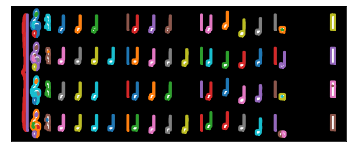

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


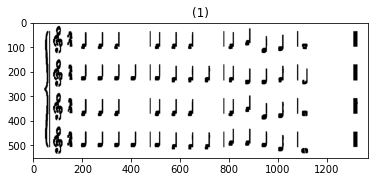

In [122]:
import cv2
from commonfunctions import *
from skimage import morphology
from skimage.measure import find_contours
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
import numpy as np

def getHoughLines(imgFile):
    img = cv2.imread(imgFile)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray,50,150,apertureSize = 3)

    lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
    for line in lines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))

            cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

    cv2.imwrite("gray.png", img)

def removeLinesFromSheet(imgFile):

    img = cv2.imread(imgFile)

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    adaptiveThreshHoldImage = adaptiveThresh(~gray, 15, 8)

    cv2.imwrite("adaptive.png", adaptiveThreshHoldImage)

    horizontal = adaptiveThreshHoldImage.copy()
    vertical = adaptiveThreshHoldImage.copy()

    (rows, cols) = adaptiveThreshHoldImage.shape

    horizontalSize = cols//30
    verticalSize = rows//30

    horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT,(horizontalSize, 1))

    horizontal = cv2.erode(horizontal, horizontalStructure, iterations = 1)
    horizontal = cv2.dilate(horizontal, horizontalStructure, iterations = 1)

    cv2.imwrite("horizontal.png", horizontal)

    verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT,(1, 3))

    vertical = cv2.erode(vertical, verticalStructure, iterations = 1)
    vertical = cv2.dilate(vertical, verticalStructure, iterations = 1)

    vertical = cv2.bitwise_not(vertical)

    cv2.imwrite("verical.png", vertical)

    smoothedThreshHoldImg = cv2.adaptiveThreshold(vertical, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, -2)

    cv2.imwrite("edges.png", smoothedThreshHoldImg)
    cv2.imwrite("bitwise.png", horizontal)
    output = adaptiveThreshHoldImage - horizontal
    cv2.imwrite("output.png", output)
    return output

def read_staff_lines(img):
	edges = cv2.Canny(img,150,700)

	lines = cv2.HoughLines(edges,1,np.pi/180,200)
	staff_lines = []
	for rho,theta in lines[0]:
	    a = np.cos(theta)
	    b = np.sin(theta)
	    x0 = a*rho
	    y0 = b*rho
	    x1 = int(x0 + 1000*(-b))
	    y1 = int(y0 + 1000*(a))
	    x2 = int(x0 - 1000*(-b))
	    y2 = int(y0 - 1000*(a))

	    th = 10 #pixels
	    too_close = False

	    # only appends lines if they're a reasonable distance
	    # from other lines
	    # would be better if used averaging between close lines instead of
	    # just taking the first one we see and tossing the other
	    for y in staff_lines:
	      	if abs(y - y1) <= th:
	    	    too_close = True
	    if not too_close:
	    	staff_lines.append((y1))

	return staff_lines
path = "./dataset/multiple_lines_scanned.png"
getHoughLines(path)
thresholded = removeLinesFromSheet(path)
output = thresholded
se = np.ones((3,3))
# se[1,: ] = 1
# se[:, 1] = 1

#[[0, 1, 0],[1, 1, 1],[0, 1, 0]]
se = np.ones((4, 2))
output = morphology.binary_erosion(output, se)
se = np.ones((10,3))
output = morphology.binary_dilation(output, se)





# Find contours at a constant value of 0.8
contours = find_contours(output, 0.8)

fig, ax = plt.subplots()
ax.imshow(output, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()




io.imsave("output.png", 1-output.astype('float64'))
show_images([1-output])
#output = cv2.dilate(output, horizontalStructure, iterations = 1)


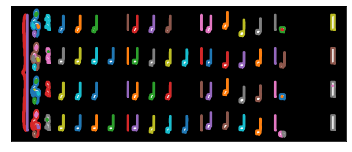

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


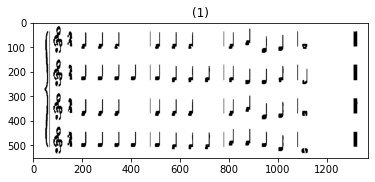

In [117]:
output = thresholded / 255

se = np.ones((3,3))
# se[1,: ] = 1
# se[:, 1] = 1

#[[0, 1, 0],[1, 1, 1],[0, 1, 0]]
se = np.ones((4, 2))
output = morphology.binary_erosion(output, se)
se = np.ones((10,3))
output = morphology.binary_dilation(output, se)
output = thin(output/255, 1)




# Find contours at a constant value of 0.8
contours = find_contours(output, 0.8)

fig, ax = plt.subplots()
ax.imshow(output, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()




io.imsave("output.png", 1-output.astype('float64'))
show_images([1-output])
#output = cv2.dilate(output, horizontalStructure, iterations = 1)

In [199]:
import numpy as np
import cv2

gray = cv2.imread('dataset/multiple_lines_scanned.png', cv2.IMREAD_GRAYSCALE)
thresh = adaptiveThresh(gray, 15, 8)

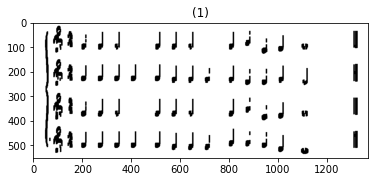

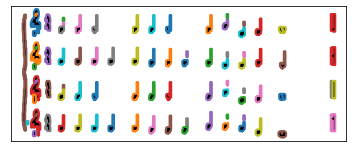

In [203]:
gray = thresh
edges = cv2.Canny(gray,50,150,apertureSize = 3)
cv2.imwrite('edges-50-150.jpg',edges)
minLineLength=100
lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=100,lines=np.array([]), minLineLength=minLineLength,maxLineGap=80)

a,b,c = lines.shape
for i in range(a):
    x = lines[i][0][0] - lines [i][0][2]
    y = lines[i][0][1] - lines [i][0][3]
    if x!= 0:
        if abs(y/x) <1:
            cv2.line(gray, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (255, 255, 255), 1, cv2.LINE_AA)

se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE , (4,4))
gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, se)
gray = np.where(gray % 255, 0, gray)
gray =1- morphology.binary_dilation(255 - gray, np.ones((11,3)))
#gray = 1 - skeletonize(gray)

# height, width = gray.shape
# for i in range(height):
#     for j in range(width):
#         if (gray[i, j] != 0 and gray[i,j] != 255):
#             print(gray[i,j]) 

io.imsave('houghlines.png', gray.astype('float64'))
show_images([gray])


output = gray
# Find contours at a constant value of 0.8
contours = find_contours(output, 0.8)

fig, ax = plt.subplots()
ax.imshow(output, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()